# **🔎📊🧩 Basic Data Exploration**

<img src="../assets/banner_basic_data_exploration.jpg" style="width:95%">

- **Basic Data Exploration** is the crucial first step that involves getting a broad understanding of the data at hand.

- This process helps you grasp the structure, quality, and key characteristics of your dataset, setting a solid foundation for further analysis.

- This notebook automates the process — simply run it to generate an initial overview of your dataset with minimal effort.

- Make sure to update the `data_file_path` and `identifier_column` entries in your `config.yaml` file before running the notebook.

---
---
**📦 Import General Libraries**

In [1]:
import pandas as pd
import missingno as msno

---
**⚙️ Configure Imports**

In [2]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # if running from folder with parent directory as project root
sys.path.append(str(project_root))

---
**🔧 Configure Notebook**

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'  # Show all outputs in a cell

---
**🚀 Load Config from `config.yaml`**

In [4]:
import yaml

config_path = "../config.yaml"
with open(config_path, "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

DATA_FILE_PATH = config["data_file_path"]
IDENTIFIER_COLUMN = config["identifier_column"]
TARGET_COLUMN = config["target_column"]
RANDOM_STATE = config["random_state"]
TEST_SIZE = config["test_size"]

---
**📥 Load Data into Pandas DataFrame**

In [5]:
RELATIVE_FILE_PATH = Path("../", DATA_FILE_PATH)

df = pd.read_csv(RELATIVE_FILE_PATH)
df.head()

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions
0,0,High-risk,63.0,Male,4.0,7 days,Non-smoker,Low,Low,5.0
1,1,High-risk,67.0,Male,3.0,2 days,Non-smoker,Low,Low,4.0
2,2,Low-risk,34.0,Female,1.0,7 days,Non-smoker,Medium,Medium,5.0
3,3,High-risk,63.0,Male,5.0,3 days,Smoker,Medium,Medium,2.0
4,4,High-risk,45.0,Female,1.0,7 days,Smoker,High,Low,3.0


---
---
# **⚡ 1. Auto EDA**

- Automated Exploratory Data Analysis (AutoEDA) generates a quick, interactive overview of your dataset, highlighting trends, outliers, and key relationships.

- It complements the manual, domain-specific exploration, providing additional insights to guide deeper analysis.

- ⚠️ Note: If you encounter compatibility issues, you can skip this section — the AutoEDA report is supplementary and does not affect the main EDA findings.

In [6]:
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(
    df=df,
    title="Profiling Report (Light)",
    minimal=True,          # fast, skips correlations & interactions
    explorative=True,      # disables unnecessary computations
    # dark_mode=True
)

# Render the profiling report directly in the notebook
profile.to_notebook_iframe()

# To avoid plotting issues after running the above library
%matplotlib inline

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 565.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **📉 2. DataFrame Shape**

In [7]:
df.shape

(10100, 10)

**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **🕵️ 3. Data Inspection**

- Understand how the data is structured and organized, including the arrangement of features and records.

- Identify any immediate patterns, anomalies, or inconsistencies that may warrant further investigation.

- Verify that the data has been loaded correctly and aligns with expectations.

---
## └─ **Inspect first 5 rows**

- Provides an initial glimpse of the data structure, column names, and sample values.

- Helps verify data loading and understand basic patterns or formats in the dataset.

In [8]:
df.head()  

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions
0,0,High-risk,63.0,Male,4.0,7 days,Non-smoker,Low,Low,5.0
1,1,High-risk,67.0,Male,3.0,2 days,Non-smoker,Low,Low,4.0
2,2,Low-risk,34.0,Female,1.0,7 days,Non-smoker,Medium,Medium,5.0
3,3,High-risk,63.0,Male,5.0,3 days,Smoker,Medium,Medium,2.0
4,4,High-risk,45.0,Female,1.0,7 days,Smoker,High,Low,3.0


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
## └─ **Inspect last 5 rows**

- Provides a glimpse of the ending records, helping to identify patterns or anomalies toward the end of the dataset.

- Ensures completeness of the data and verifies that all records are loaded correctly.

In [9]:
df.tail()

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions
10095,10095,Low-risk,54.0,Male,2.0,5 days,Non-smoker,High,Medium,1.0
10096,10096,Low-risk,40.0,Male,0.0,7 days,Non-smoker,Medium,High,2.0
10097,10097,Low-risk,33.0,Female,0.0,2 days,Non-smoker,Medium,High,3.0
10098,10098,Low-risk,49.0,Male,0.0,7 days,Non-smoker,Medium,Medium,3.0
10099,10099,High-risk,57.0,Female,1.0,3 days,Smoker,Medium,Medium,2.0


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
## └─ **Inspect 5 sample rows**

- Offers an unbiased snapshot of the dataset’s structure and content by selecting random rows, avoiding biases inherent in viewing only the first or last entries.

- Enables the discovery of patterns, anomalies, or inconsistencies that might be missed when inspecting sequential rows.

- A fixed `random_state=42` ensures reproducibility, guaranteeing that the sampled observations remain consistent across runs for the below analysis.

In [10]:
df.sample(5, random_state=42)

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions
7401,7401,Low-risk,35.0,Male,3.0,3 days,Non-smoker,Medium,Medium,1.0
5834,5834,Low-risk,50.0,Male,0.0,2 days,Non-smoker,Medium,Low,2.0
2122,2122,Low-risk,27.0,Female,2.0,5 days,Non-smoker,Medium,Medium,5.0
8788,8788,High-risk,75.0,Male,3.0,7 days,Smoker,Medium,Medium,0.0
304,304,Low-risk,55.0,Female,0.0,4 days,Smoker,Medium,Medium,1.0


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **🗒️ 4. DataFrame Summary**

- Display a summary of the DataFrame, including column names, data types, and non-null counts.

- Offers a high-level overview of the dataset's structure, enabling quick identification of missing values, inconsistent data types, and potential formatting issues.

- Ensures all columns are correctly formatted and flags areas that may require cleaning, preprocessing, or further investigation to maintain data integrity.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10100 non-null  int64  
 1   Risk_Category                  10099 non-null  object 
 2   Age                            10099 non-null  float64
 3   Gender                         10098 non-null  object 
 4   Comorbidities                  10097 non-null  float64
 5   Length_of_Stay                 10098 non-null  object 
 6   Smoking_Status                 10100 non-null  object 
 7   Medication_Adherence           10099 non-null  object 
 8   Socioeconomic_Status           10100 non-null  object 
 9   Number_of_Previous_Admissions  10100 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 789.2+ KB


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **🔢 5. DataFrame Statistics**

- Generate summary statistics for numerical columns in the DataFrame.

- Provides insights into central tendencies (mean, median), variability (standard deviation), and ranges (min, max) of numerical features.

- Helps identify potential issues such as outliers, skewness, or unrealistic values in the data.

In [12]:
# Display in normal notation instead of scientific
with pd.option_context('float_format', '{:.3f}'.format):
    df.describe() .T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10100.000,5049.500,2915.763,0.000,2524.750,5049.500,7574.250,10099.000
Age,10099.000,57.962,791.193,-22964.000,41.000,49.000,58.000,62034.000
Comorbidities,10097.000,2.797,95.162,-6083.000,1.000,2.000,3.000,5019.000
Number_of_Previous_Admissions,10100.000,0.777,68.331,-5034.000,1.000,2.000,3.000,1383.000


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **❓ 6. Missing Values**

- Missing values can wreak havoc on your analyses if not handled properly.

- By checking for null values, you can identify which columns have missing data and decide how to handle them.

- Proper handling of missing values ensures the accuracy and reliability of your models.

---
## └─ **Numerical Breakdown**

- Calculate the total number of missing values per column.

- Quantifies the extent of missing data for each feature.

In [13]:
null_summary = (
    df.isnull().sum()
    .to_frame("missing_count")
    .assign(
        missing_pct=lambda x: (
            (x["missing_count"] / len(df) * 100)
            .round(2)
            .apply(lambda v: "-" if v == 0 else f"{v:.2f}%")
        ),
        dtype=df.dtypes.astype(str)
    )
)

null_summary

,missing_count,missing_pct,dtype
Unnamed: 0,0,-,int64
Risk_Category,1,0.01%,object
Age,1,0.01%,float64
Gender,2,0.02%,object
Comorbidities,3,0.03%,float64
Length_of_Stay,2,0.02%,object
Smoking_Status,0,-,object
Medication_Adherence,1,0.01%,object
Socioeconomic_Status,0,-,object
Number_of_Previous_Admissions,0,-,float64


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
## └─ **Visual Representation**

- Visualize the distribution of missing values across all columns.

- Missing values are displayed as white lines in the matrix.

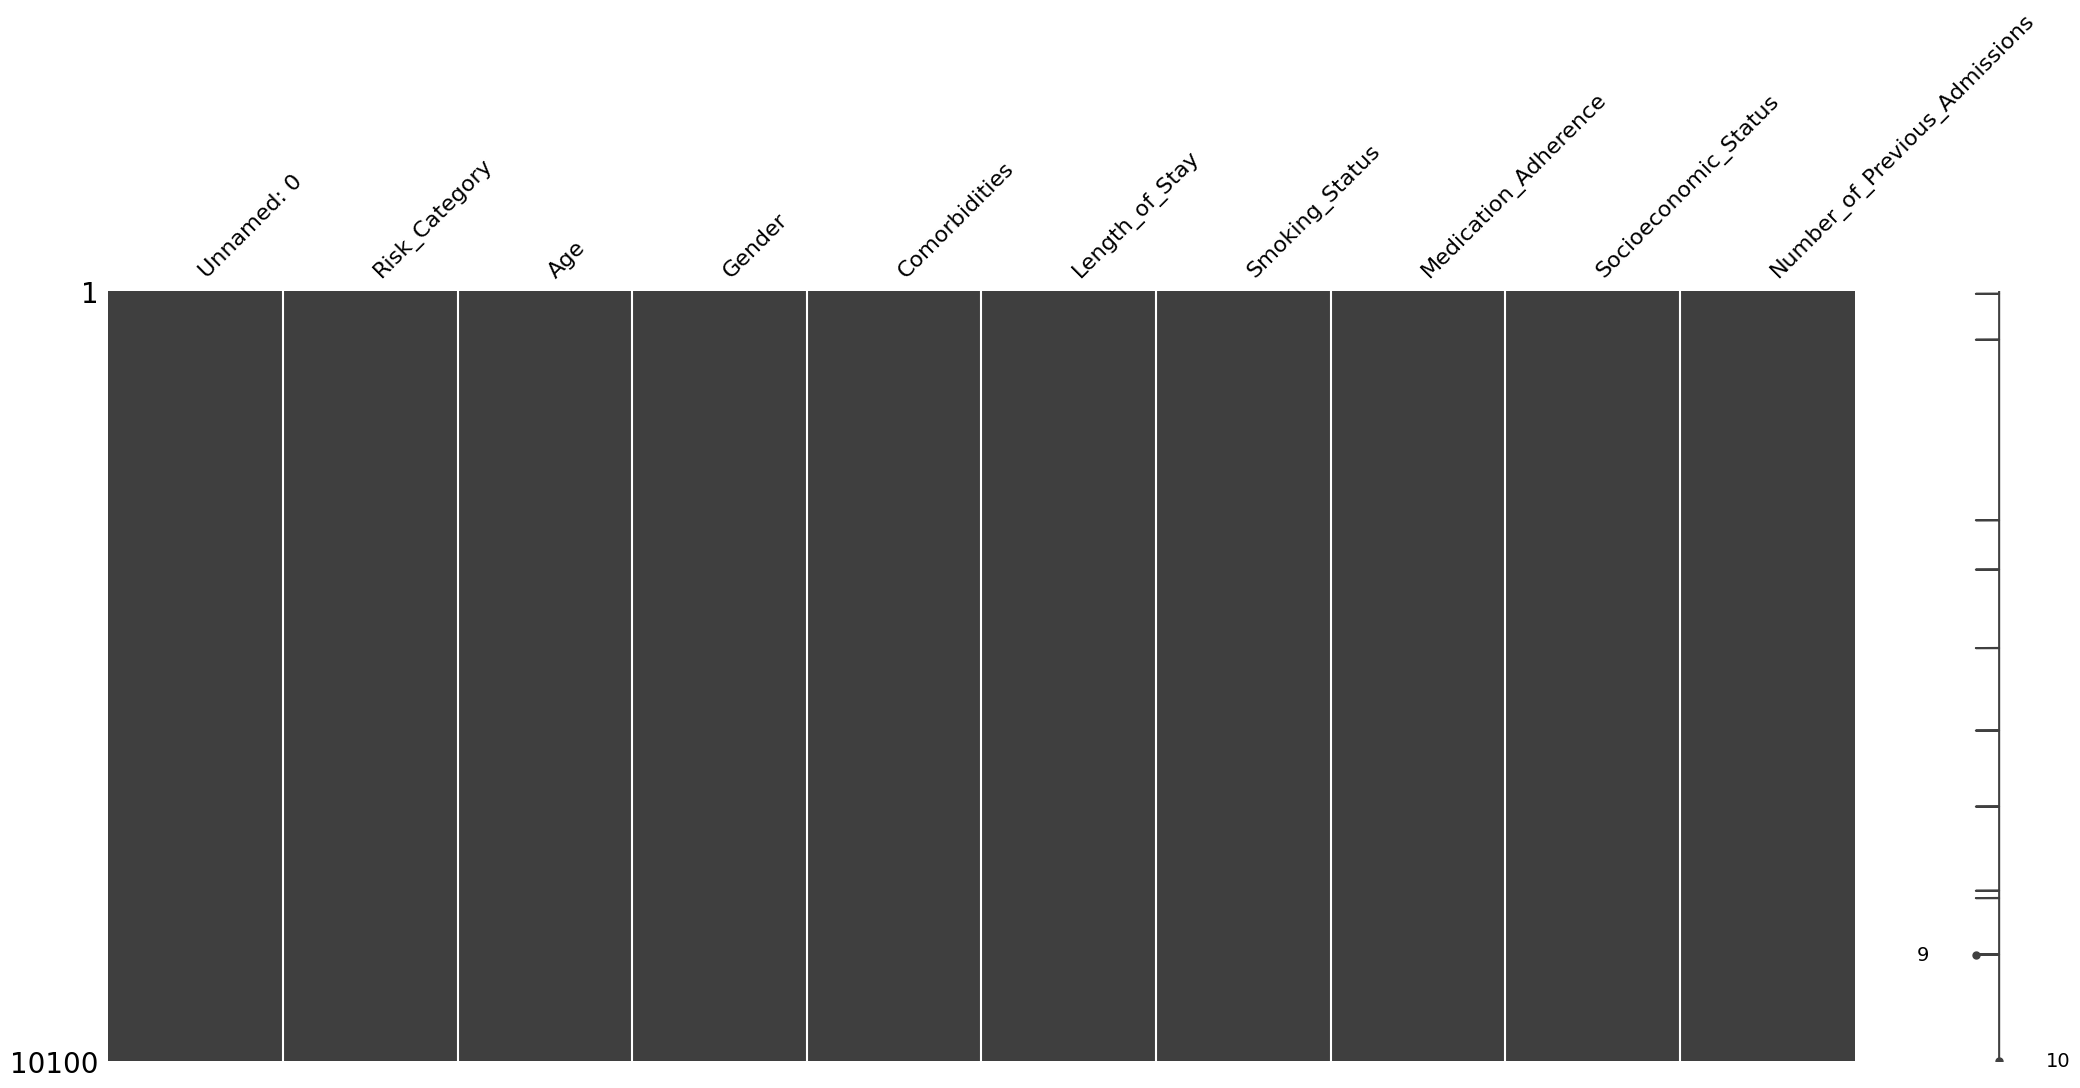

In [14]:
msno.matrix(df);

**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
## └─ **Correlation Heatmap**

- Visualize the correlation of missing values for all numerical columns.

- It helps identify whether missing values in one column are correlated with missing values in other columns.

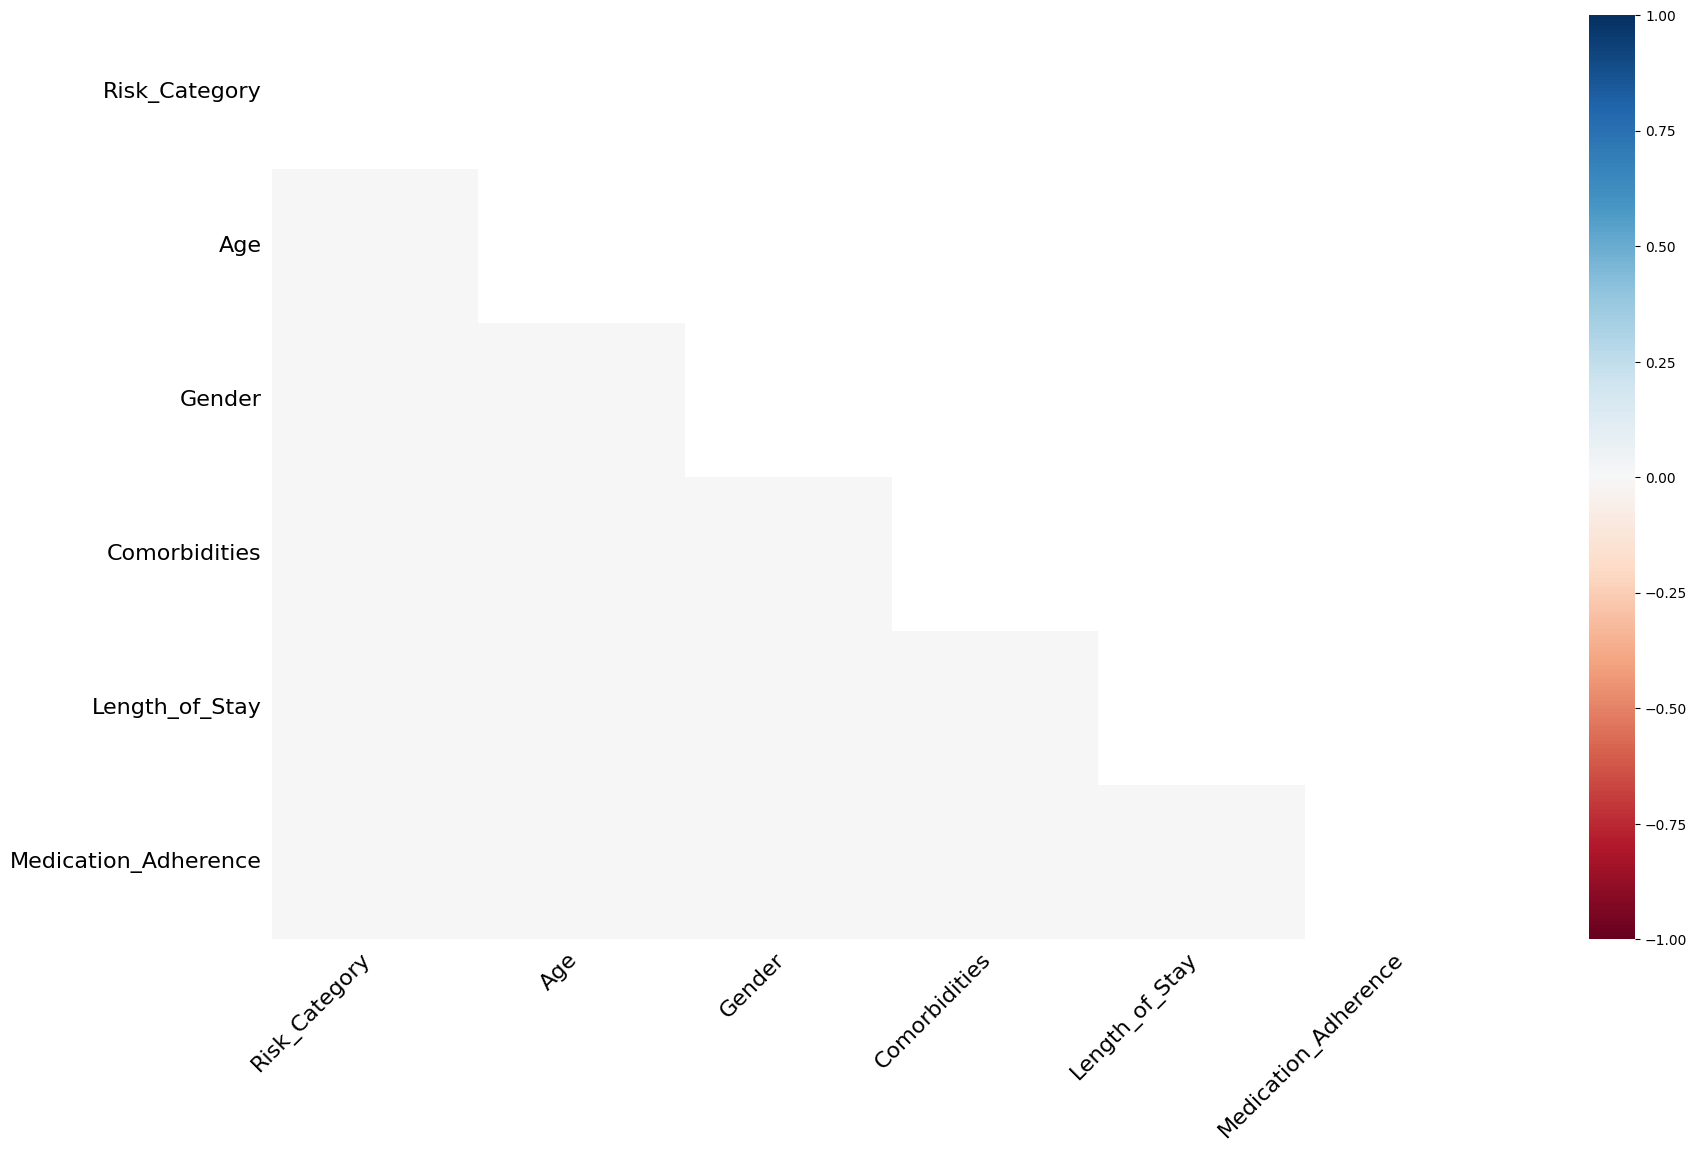

In [15]:
msno.heatmap(df);

**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
# **🥈 7. Duplicate Values**

- Duplicate values can distort analyses and bias summary statistics if not addressed.

- Identifying duplicates allows you to assess whether they are valid repeats or errors in data entry.

- Handling duplicate values appropriately (e.g., aggregation, removal, or correction) improves the quality and reliability of your dataset.

---
## └─ **Duplicate Rows**

- Duplicate rows often arise from repeated data collection or merging datasets and can inflate counts.

- Removing exact duplicate rows ensures accurate analysis and prevents over-representation of certain observations.

In [16]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
## └─ **Duplicate Identifiers**

- Duplicate identifiers (e.g., customer ID, transaction ID) can indicate data integrity issues.

- Ensuring unique identifiers is crucial for linking records accurately and maintaining consistency across analyses.

In [17]:
if IDENTIFIER_COLUMN:  # checks not None and not empty
    unique_data = df[IDENTIFIER_COLUMN].nunique()
    print("Shape:", df.shape)
    print("Unique Data:", unique_data)
else:
    print("Shape:", df.shape)
    print("Unique Data: [skipped — no identifier column]")

Shape: (10100, 10)
Unique Data: 10100


**└─ 💡 Observations / Insights ──**

- `Key finding 1`  

- `Key finding 2`  

---
---
---